## UNIFIED MENTOR INTERNSHIP

HEART DISEASE DIAGNOSTICS DATA ANALYSIS PROJECT

PANKAJ VARSHNEY 

UNID: UMIP8438

In [17]:
import pandas as pd

# Load the dataset
data = pd.read_csv("C:/Users/himan/Downloads/Heart Disease data.csv")

# Display the first few rows of the dataset
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [19]:
#Checking the columns names
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [20]:
# Check for missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:
data.shape

(1025, 14)

In [22]:
# Get summary statistics
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


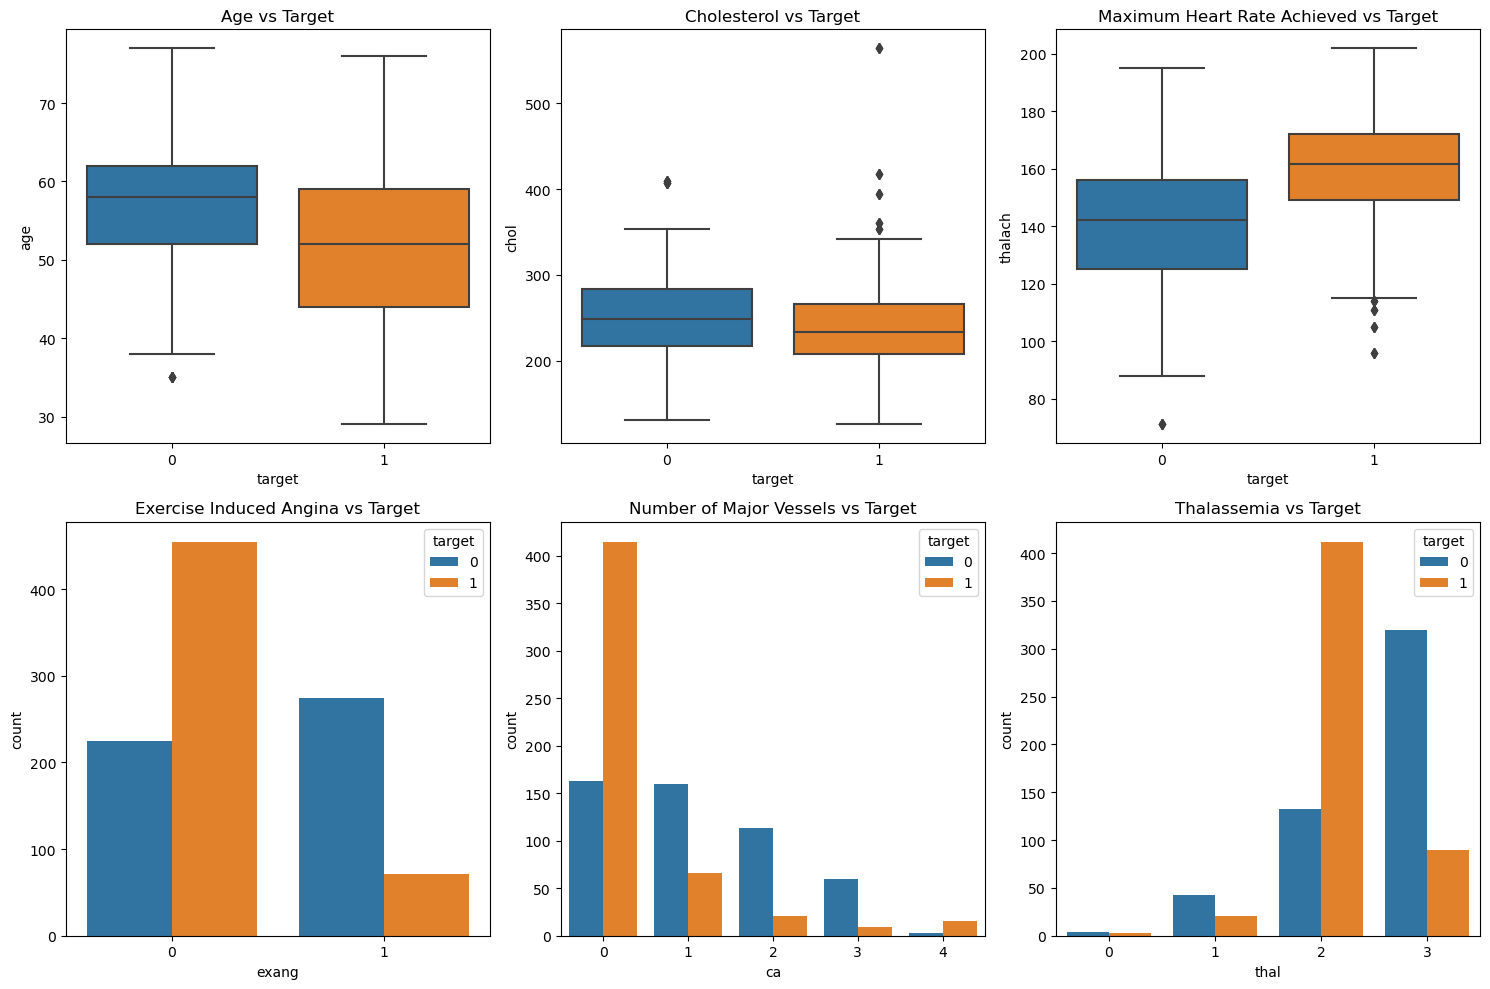

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plots for continuous variables
plt.figure(figsize=(15, 10))

# Age vs Target
plt.subplot(2, 3, 1)
sns.boxplot(x='target', y='age', data=data)
plt.title('Age vs Target')

# Cholesterol vs Target
plt.subplot(2, 3, 2)
sns.boxplot(x='target', y='chol', data=data)
plt.title('Cholesterol vs Target')

# Maximum heart rate achieved vs Target
plt.subplot(2, 3, 3)
sns.boxplot(x='target', y='thalach', data=data)
plt.title('Maximum Heart Rate Achieved vs Target')

# Count plots for categorical variables
plt.subplot(2, 3, 4)
sns.countplot(x='exang', hue='target', data=data)
plt.title('Exercise Induced Angina vs Target')

plt.subplot(2, 3, 5)
sns.countplot(x='ca', hue='target', data=data)
plt.title('Number of Major Vessels vs Target')

plt.subplot(2, 3, 6)
sns.countplot(x='thal', hue='target', data=data)
plt.title('Thalassemia vs Target')

plt.tight_layout()
plt.show()

target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


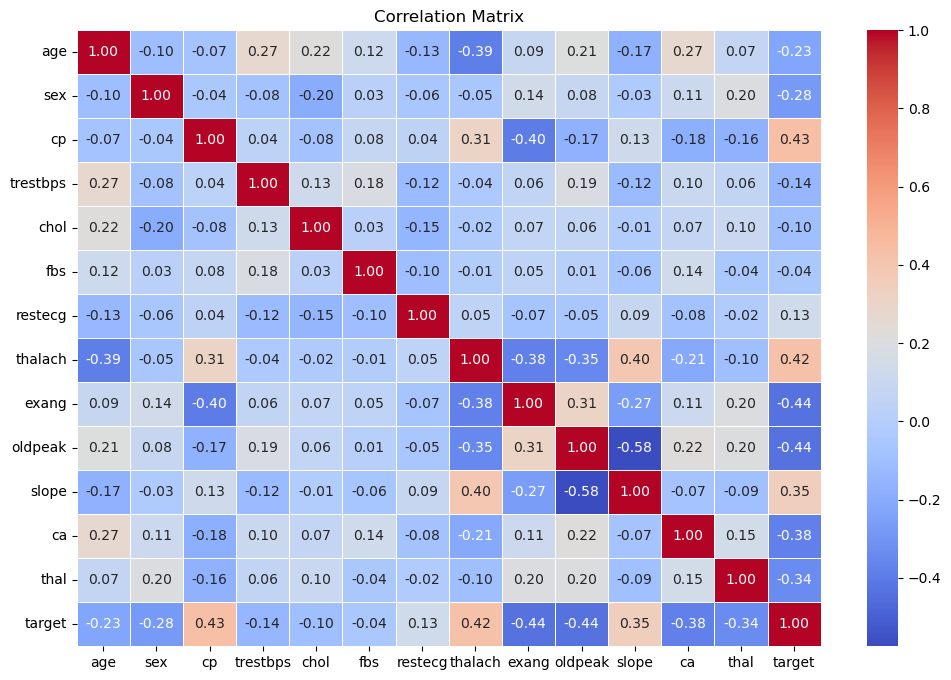

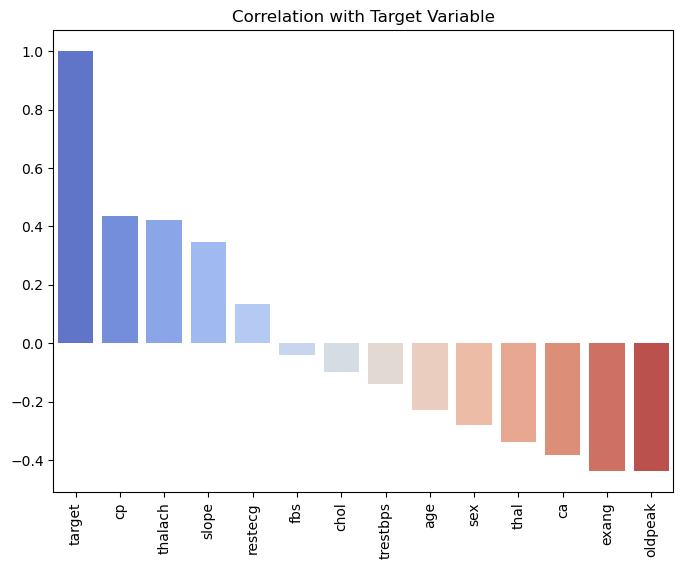

In [28]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Isolate the correlation values for the target variable
target_correlation = correlation_matrix['target'].sort_values(ascending=False)

# Display the correlation values
print(target_correlation)

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Plot correlation with target variable
plt.figure(figsize=(8, 6))
sns.barplot(x=target_correlation.index, y=target_correlation.values, palette='coolwarm')
plt.title('Correlation with Target Variable')
plt.xticks(rotation=90)
plt.show()

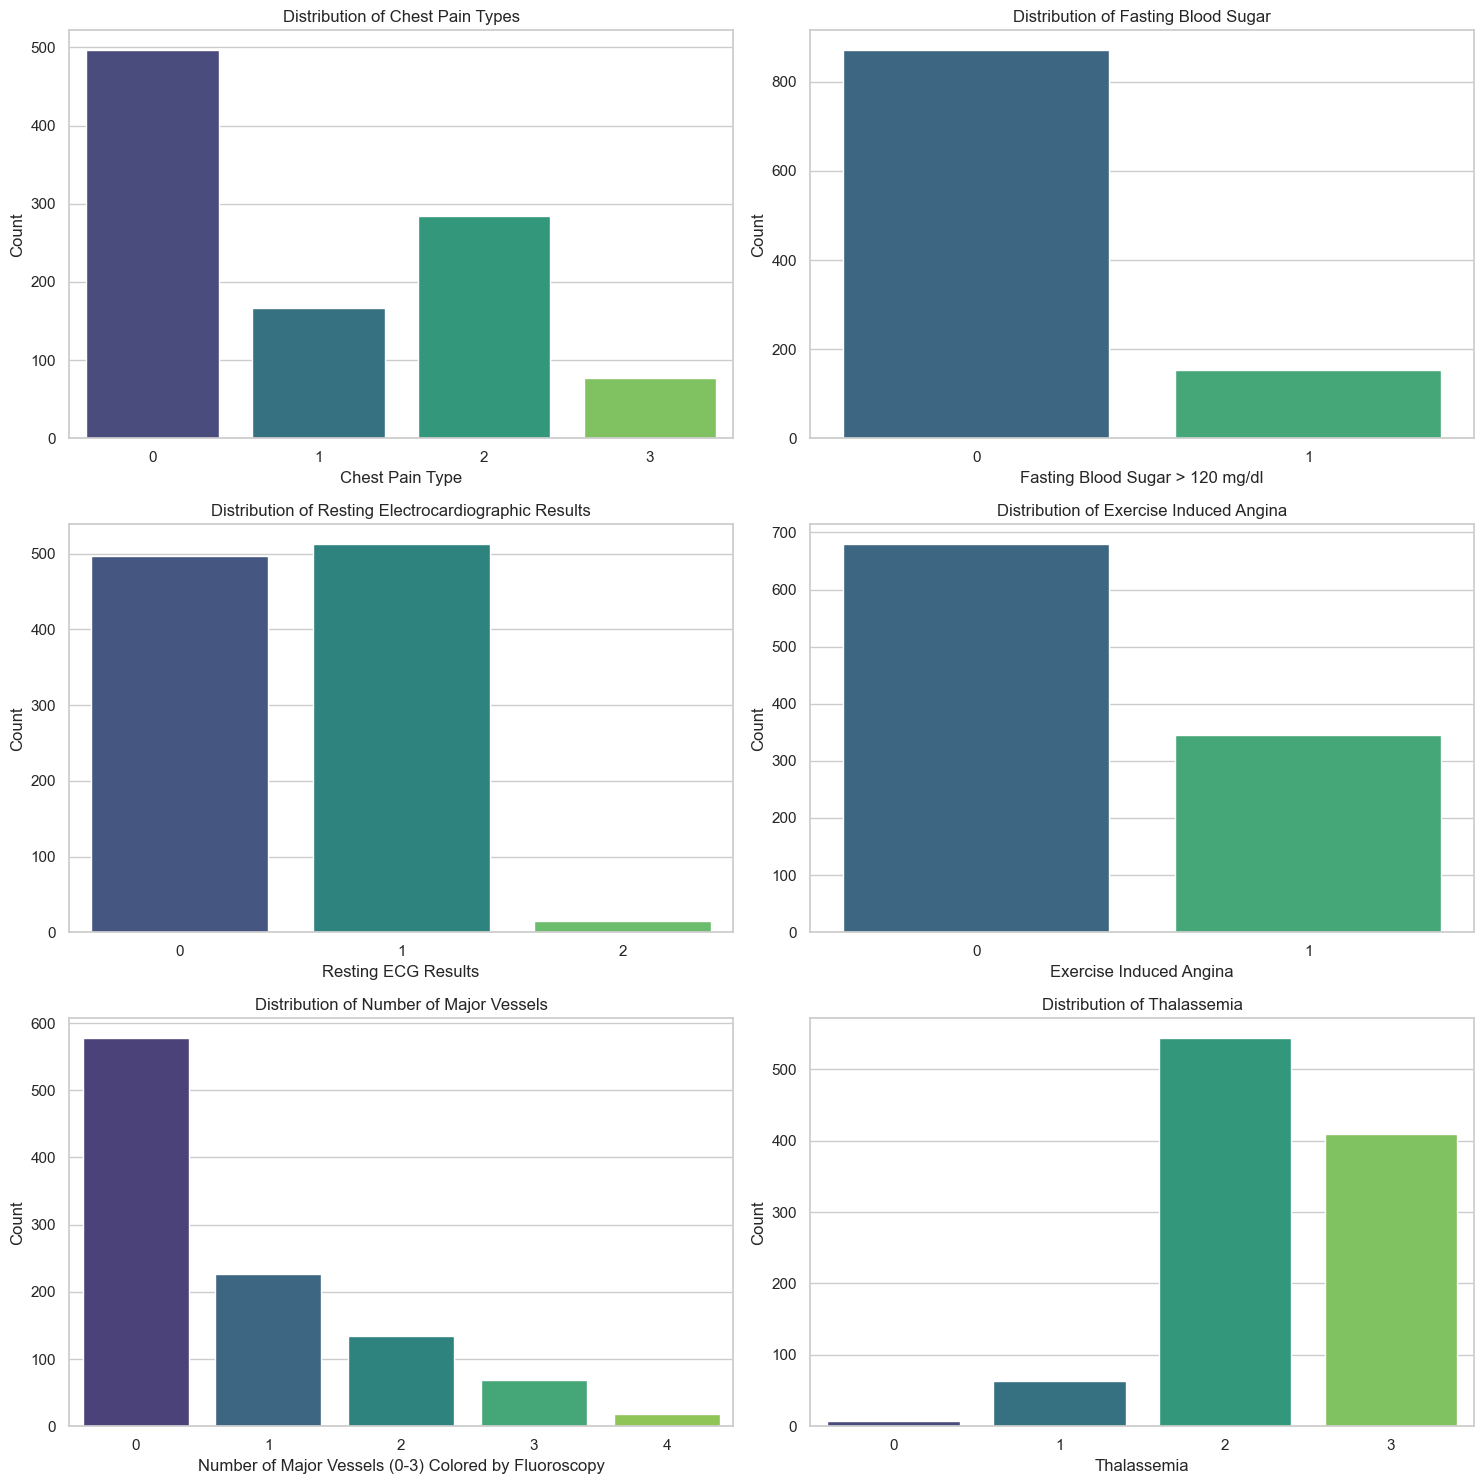

In [40]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a subplot grid for the categorical distributions
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Distribution of chest pain types (cp)
sns.countplot(x='cp', data=data, palette='viridis', ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Chest Pain Types')
axs[0, 0].set_xlabel('Chest Pain Type')
axs[0, 0].set_ylabel('Count')

# Distribution of fasting blood sugar (fbs)
sns.countplot(x='fbs', data=data, palette='viridis', ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Fasting Blood Sugar')
axs[0, 1].set_xlabel('Fasting Blood Sugar > 120 mg/dl')
axs[0, 1].set_ylabel('Count')

# Distribution of resting electrocardiographic results (restecg)
sns.countplot(x='restecg', data=data, palette='viridis', ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Resting Electrocardiographic Results')
axs[1, 0].set_xlabel('Resting ECG Results')
axs[1, 0].set_ylabel('Count')

# Distribution of exercise induced angina (exang)
sns.countplot(x='exang', data=data, palette='viridis', ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Exercise Induced Angina')
axs[1, 1].set_xlabel('Exercise Induced Angina')
axs[1, 1].set_ylabel('Count')

# Distribution of number of major vessels (ca)
sns.countplot(x='ca', data=data, palette='viridis', ax=axs[2, 0])
axs[2, 0].set_title('Distribution of Number of Major Vessels')
axs[2, 0].set_xlabel('Number of Major Vessels (0-3) Colored by Fluoroscopy')
axs[2, 0].set_ylabel('Count')

# Distribution of thalassemia (thal)
sns.countplot(x='thal', data=data, palette='viridis', ax=axs[2, 1])
axs[2, 1].set_title('Distribution of Thalassemia')
axs[2, 1].set_xlabel('Thalassemia')
axs[2, 1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\himan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


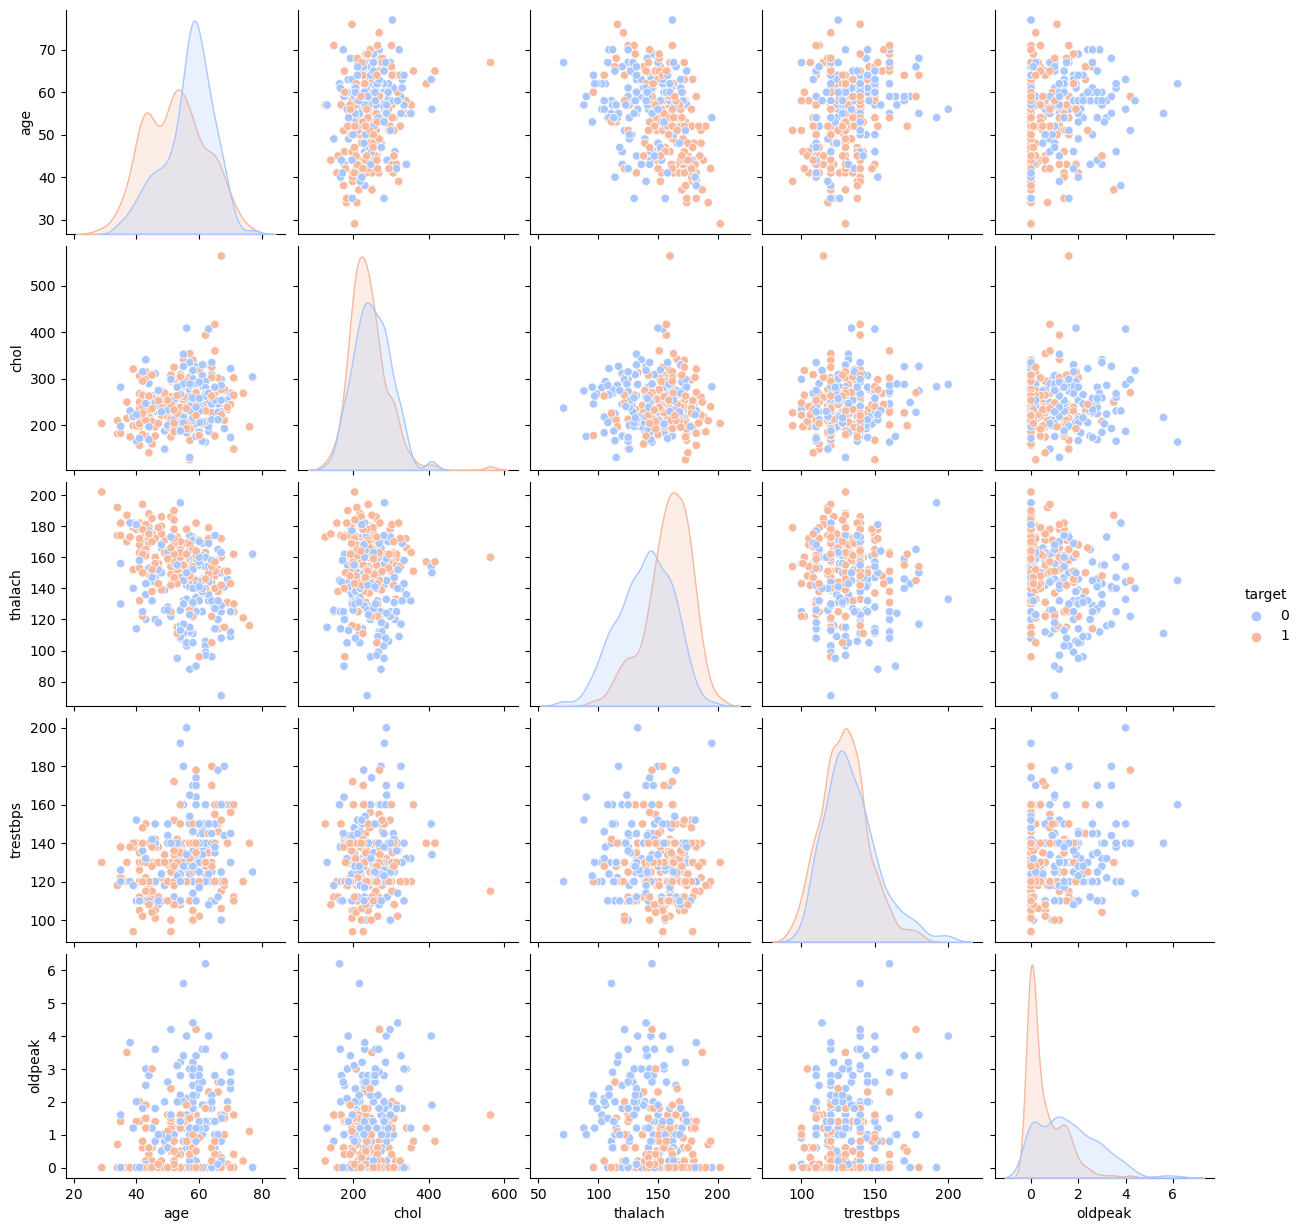

In [29]:
# Pair plot of selected features
selected_features = ['age', 'chol', 'thalach', 'trestbps', 'oldpeak', 'target']
sns.pairplot(data[selected_features], hue='target', palette='coolwarm')
plt.show()

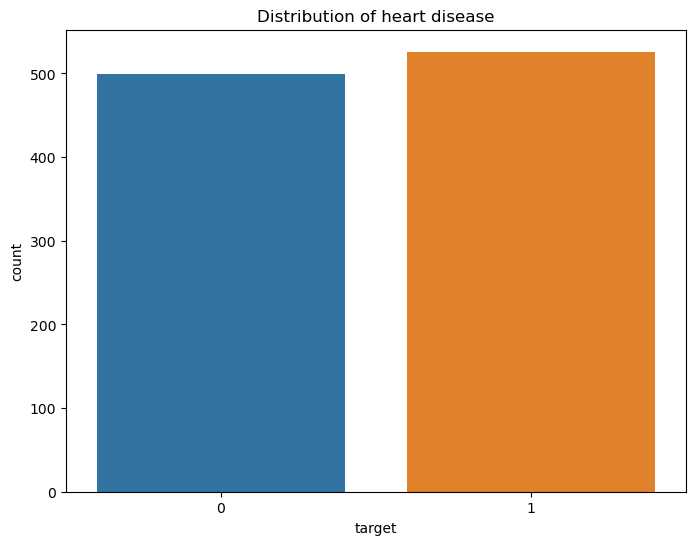

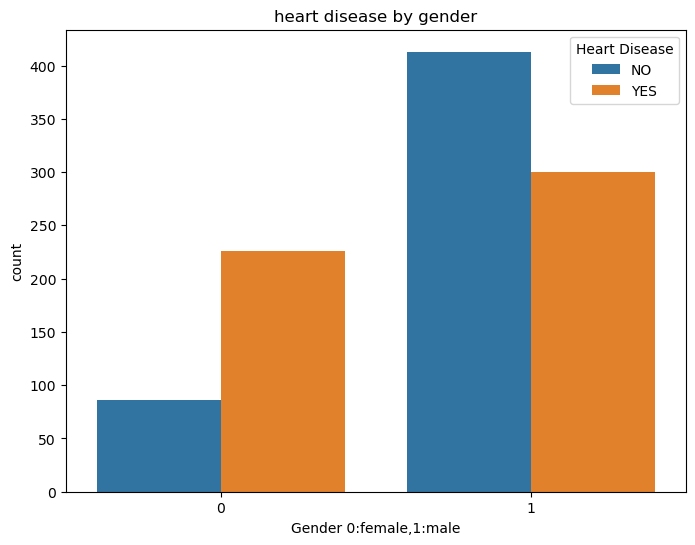

In [38]:
#Distribution of heart disease rates
plt.figure(figsize=(8,6))
sns.countplot(x='target',data=data)
plt.title('Distribution of heart disease')
plt.ylabel('count')
plt.xlabel('target')
plt.show()

#Heart disease by gender
plt.figure(figsize=(8,6))
sns.countplot(x='sex',hue='target',data=data)
plt.title('heart disease by gender')
plt.ylabel('count')
plt.xlabel('Gender 0:female,1:male')
plt.legend(title='Heart Disease',labels=['NO','YES'])
plt.show()



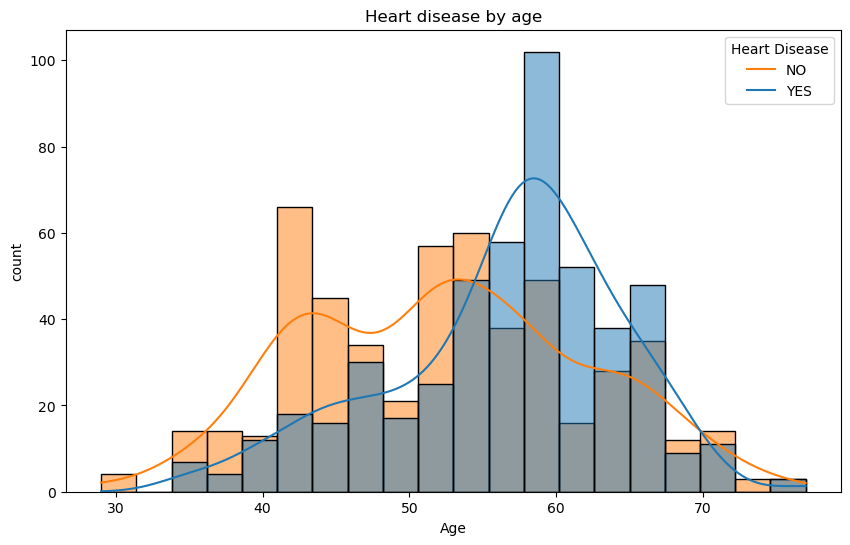

In [35]:
#heart disease by age 
plt.figure(figsize=(10,6))
sns.histplot(x='age',hue='target',data=data,bins=20,kde=True)
plt.title('Heart disease by age')
plt.ylabel('count')
plt.xlabel('Age')
plt.legend(title='Heart Disease',labels=['NO','YES'])
plt.show()

In [41]:
# Calculate mean values of numerical distributions by target (heart disease presence)
mean_values_by_target = data.groupby('target').mean()

print(mean_values_by_target)

              age       sex        cp    trestbps        chol       fbs  \
target                                                                    
0       56.569138  0.827655  0.482966  134.106212  251.292585  0.164329   
1       52.408745  0.570342  1.378327  129.245247  240.979087  0.134981   

         restecg     thalach     exang   oldpeak     slope        ca      thal  
target                                                                          
0       0.456914  139.130261  0.549098  1.600200  1.166333  1.158317  2.539078  
1       0.598859  158.585551  0.134981  0.569962  1.593156  0.370722  2.119772  


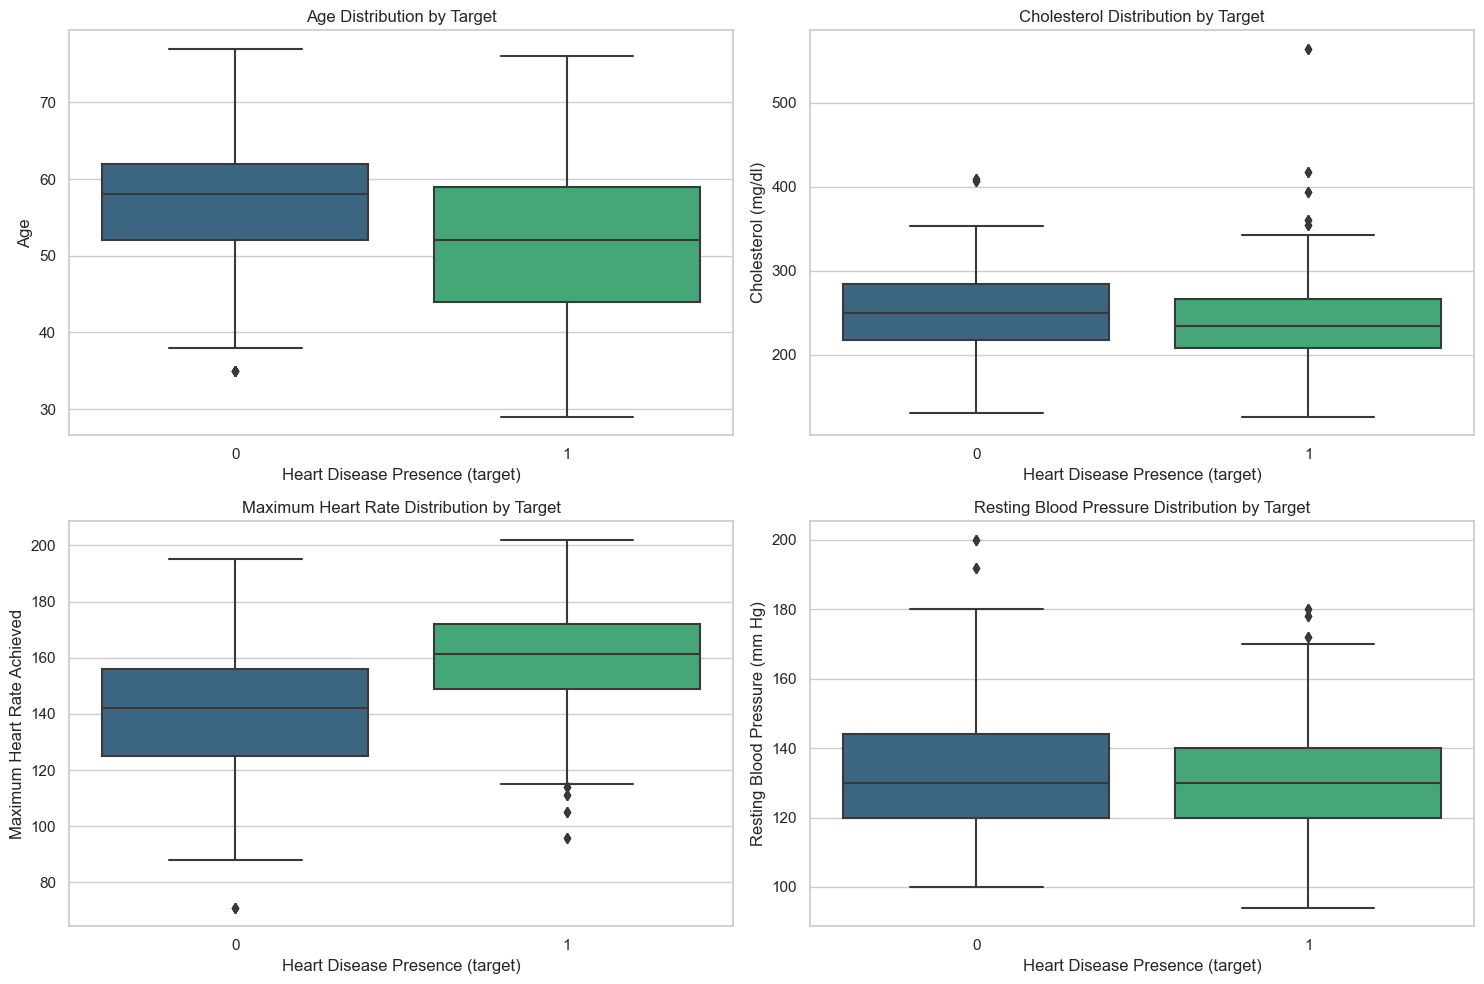

In [42]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a subplot grid for the box plots
plt.figure(figsize=(15, 10))

# Box plot of age vs. target
plt.subplot(2, 2, 1)
sns.boxplot(x='target', y='age', data=data, palette='viridis')
plt.title('Age Distribution by Target')
plt.xlabel('Heart Disease Presence (target)')
plt.ylabel('Age')

# Box plot of cholesterol vs. target
plt.subplot(2, 2, 2)
sns.boxplot(x='target', y='chol', data=data, palette='viridis')
plt.title('Cholesterol Distribution by Target')
plt.xlabel('Heart Disease Presence (target)')
plt.ylabel('Cholesterol (mg/dl)')

# Box plot of maximum heart rate achieved vs. target
plt.subplot(2, 2, 3)
sns.boxplot(x='target', y='thalach', data=data, palette='viridis')
plt.title('Maximum Heart Rate Distribution by Target')
plt.xlabel('Heart Disease Presence (target)')
plt.ylabel('Maximum Heart Rate Achieved')

# Box plot of resting blood pressure vs. target
plt.subplot(2, 2, 4)
sns.boxplot(x='target', y='trestbps', data=data, palette='viridis')
plt.title('Resting Blood Pressure Distribution by Target')
plt.xlabel('Heart Disease Presence (target)')
plt.ylabel('Resting Blood Pressure (mm Hg)')

# Adjust layout
plt.tight_layout()
plt.show()

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Separate features and target
X = data.drop('target', axis=1)
y = data['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.7951219512195122
Confusion Matrix:
[[73 29]
 [13 90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



In [32]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9853658536585366
Confusion Matrix:
[[102   0]
 [  3 100]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



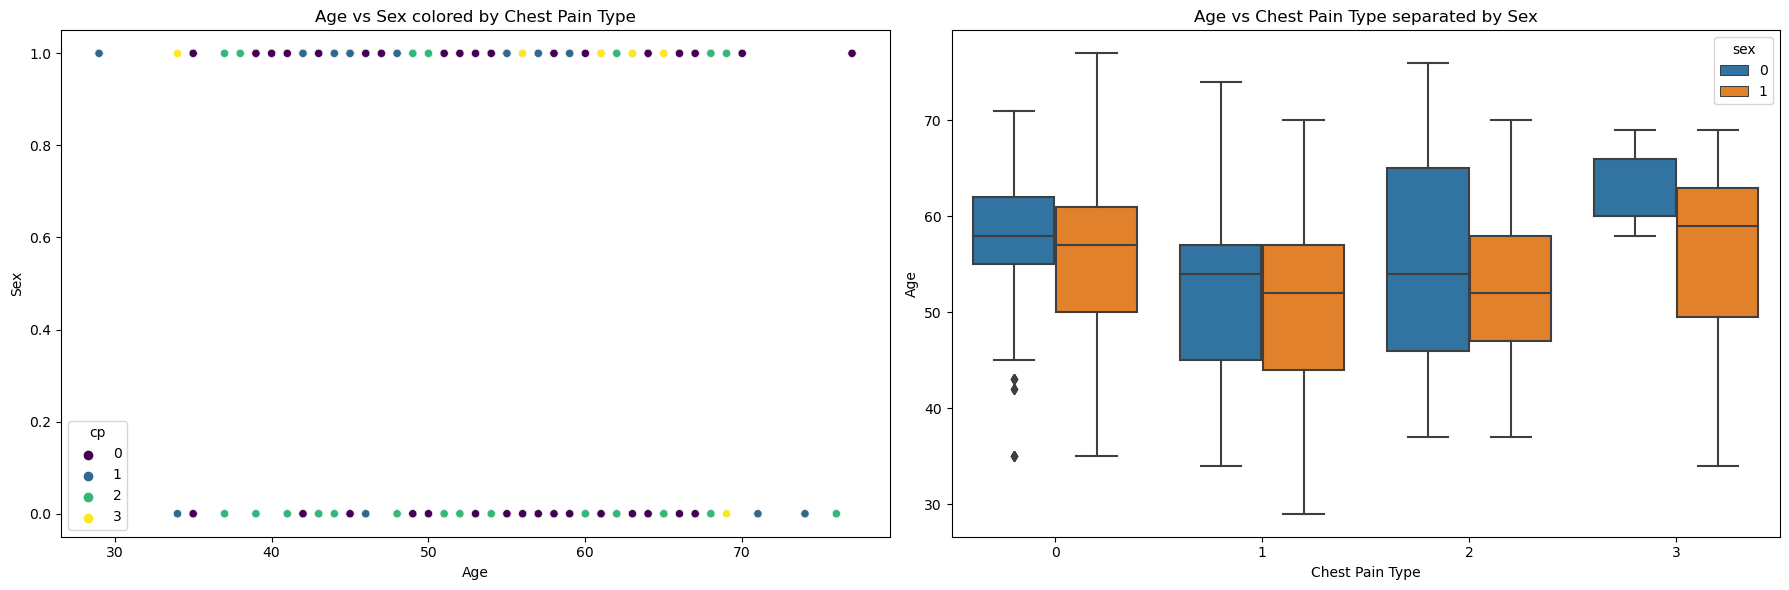

In [39]:
# Plot relationships between age, sex, and chest pain type (cp)

# Set up the matplotlib figure
plt.figure(figsize=(18, 6))

# Scatter plot of age vs. sex, colored by chest pain type (cp)
plt.subplot(1, 2, 1)
sns.scatterplot(x='age', y='sex', hue='cp', data=data, palette='viridis')
plt.title('Age vs Sex colored by Chest Pain Type')
plt.xlabel('Age')
plt.ylabel('Sex')

# Box plot of age vs. chest pain type (cp), separated by sex
plt.subplot(1, 2, 2)
sns.boxplot(x='cp', y='age', hue='sex', data=data)
plt.title('Age vs Chest Pain Type separated by Sex')
plt.xlabel('Chest Pain Type')
plt.ylabel('Age')

plt.tight_layout()
plt.show()

## Conclusion:

The analysis and modeling suggest that features like maximum heart rate achieved, exercise-induced angina, ST depression, number of major vessels, and chest pain type are significant indicators of heart disease.

Visualizations confirmed that age and sex, along with chest pain type, are important factors in assessing the risk of heart disease.